# AGENDA


---


This is our agenda:
1. What is beta?;
2. Upside and Downside beta;
3. Mathematical computation;
3. Let's work on Python;
4. Cases of study.

# 1. What is beta?


---



Beta is a measure of a stock's sensitivity to overall market movements. In finance, it’s used to understand how much a stock’s price is expected to move in relation to movements in the broader market, often represented by a major index like the S&P 500. It is a core component of the Capital Asset Pricing Model (CAPM), which estimates the expected return of an asset based on its systematic risk relative to the market.

Beta values


*   Beta = 1: A beta of 1 means the stock's price tends to move in line with the market. If the market rises by 1%, the stock is also expected to rise by 1%. Similarly, if the market falls by 1%, the stock is likely to fall by 1%.
*   Beta > 1: A beta greater than 1 indicates that the stock is more volatile than the market. For example, a beta of 1.5 suggests that if the market goes up by 1%, the stock might increase by 1.5%, and if the market goes down by 1%, the stock could decrease by 1.5%.


*   Beta < 1: A beta less than 1 means the stock is less volatile than the market. For instance, a beta of 0.5 implies that the stock would theoretically rise by only 0.5% if the market goes up by 1% and fall by 0.5% if the market decreases by 1%.

*   Beta < 0: Negative beta is rare but can occur in some types of investments. It means the stock moves inversely to the market; for example, a beta of -1 would imply that if the market rises by 1%, the stock might fall by 1%.


Traditional beta, used in financial models like CAPM, assumes a symmetric risk distribution and fails to differentiate between upside and downside risks. Therefore, our project explores a modern approach that separates beta—an indicator of a stock's sensitivity to market movements—into two components: Upside Beta and Downside Beta.





#2. Upside and downside beta


---





##Upside beta
Traditional portfolio construction methods, such as mean-variance optimization, have long relied on the assumption that stock returns follow a normal distribution. This framework treats both upward and downward price movements with equal weight, failing to account for the fact that investors are often more sensitive to losses than to gains. Moreover, the assumption of symmetric risk underestimates the likelihood of extreme market movements, especially during times of market stress.

To address this, we introduce the concept of upside beta, a refined risk metric that helps investors understand how a stock behaves during market upswings. By focusing on the positive half of market returns, upside beta offers a more targeted approach to portfolio construction, especially for those seeking to maximize returns in rising markets while minimizing exposure to downturns.

Upside beta is a measure of a stock’s sensitivity to positive market movements, calculated during periods when the benchmark index (e.g., the S&P 500) experiences positive returns.

#The importance of Upside beta

The importance of upside beta
Upside beta can be particularly useful in building portfolios for market growth. A portfolio made up of stocks with high upside betas will likely outperform the market during periods of market rallies. This is ideal for investors with a positive outlook who wish to take advantage of upward momentum in the market.

Conversely, a stock with a low upside beta will generally show weaker performance during market upswings, which could be beneficial for risk-averse investors seeking more stability. By selecting stocks with higher upside betas, investors can better align their portfolios with growth objectives, maximizing returns in periods of market strength.




## Downside beta
Downside Beta is a financial metric used to measure an asset's sensitivity to market movements, specifically during periods of negative market performance. Unlike traditional beta, which considers both upward and downward market fluctuations, downside beta focuses exclusively on the downside, offering a clearer picture of how an asset behaves during market downturns. This makes it particularly valuable for risk-averse investors and portfolio managers concerned with minimizing losses.

While traditional beta measures an asset’s overall volatility relative to the market, downside beta isolates the periods when the market is declining. By focusing on these specific periods, downside beta provides insights into the risks of loss associated with holding a particular asset.

This focus is especially important for investors prioritizing capital preservation, as it aligns with their concerns about the potential for negative returns. By understanding downside beta, such investors can make more informed decisions about which assets to include in their portfolios to mitigate exposure to adverse market conditions.

#The importance of Downside beta

Downside beta is an essential tool for investors and portfolio managers who prioritize understanding and managing risks during negative market conditions.

By using downside beta, portfolio managers can select assets that reduce overall portfolio sensitivity to negative market movements. This helps in building more resilient portfolios that can better withstand market turbulence.Assets with low or negative downside beta can act as defensive positions in a portfolio, providing stability during market downturns. Identifying such assets helps in creating balanced portfolios that perform better in adverse conditions.What's more, in periods of heightened uncertainty or expected market downturns, downside beta offers insights into which assets are more likely to hold their value or perform relatively well, guiding more informed investment decisions.

# 3. How to compute mathematically


---



**Upside Beta:**

$$
\beta_{\text{up}} = \frac{\text{Cov}(R_s, R_{\text{market}} \mid R_{\text{market}} > 0)}{\text{Var}(R_{\text{market}} \mid R_{\text{market}} > 0)}
$$


**Downside Beta:**

$$
\beta_{\text{down}} = \frac{\text{Cov}(R_s, R_{\text{market}} \mid R_{\text{market}} < 0)}{\text{Var}(R_{\text{market}} \mid R_{\text{market}} < 0)}
$$

# 4. Let's work on Python

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.style.use('tableau-colorblind10')
sns.set_style('darkgrid')

## Downloading the data from yahoo finance


To start we downloaded,from Yahoo Finance, historical data from different companies such as Apple, Tesla, Amazon, JPMorgan Chase and Newmont Mining and also the historical data from the S&P500 starting from January 1st, 2018, to November 8th, 2024.

In [ ]:
apple_data = yf.download('AAPL', start='2018-01-01', end='2024-11-08')
sp500_data = yf.download('^GSPC', start='2018-01-01', end='2024-11-08')
tsla_data = yf.download('TSLA', start='2018-01-01', end='2024-11-08')
amzn_data = yf.download('AMZN', start='2018-01-01', end='2024-11-08')
jpm_data = yf.download('JPM', start='2018-01-01', end='2024-11-08')
nem_data= yf.download('NEM', start='2018-01-01', end='2024-11-08')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Data manipulation

For data manipulation it is necessary to compute the log returns.

Log returns are used to avoid issues associated with simple returns, such as:
- Scale dependence: Log returns are scale-invariant
- Time inconsistency: Log returns compound over time more intuitively
- Asymmetry: Log returns handle negative returns more appropriately

We computed log returns using the formula: $log(St) - log(St-1)$.

This method is preferred over $ln(1+Rn)$ as it directly captures the proportional change between two consecutive prices.

In [ ]:
apple_data['Log_Return'] = np.log(apple_data['Adj Close'] / apple_data['Adj Close'].shift(1))
sp500_data['Log_Return'] = np.log(sp500_data['Adj Close'] / sp500_data['Adj Close'].shift(1))
tsla_data['Log_Return'] = np.log(tsla_data['Adj Close'] / tsla_data['Adj Close'].shift(1))
amzn_data['Log_Return'] = np.log(amzn_data['Adj Close'] / amzn_data['Adj Close'].shift(1))
jpm_data['Log_Return'] = np.log(jpm_data['Adj Close'] / jpm_data['Adj Close'].shift(1))
nem_data['Log_Return'] = np.log(nem_data['Adj Close'] / nem_data['Adj Close'].shift(1))
# Removing NaN
apple_data.dropna(inplace=True)
tsla_data.dropna(inplace=True)
sp500_data.dropna(inplace=True)
amzn_data.dropna(inplace=True)
jpm_data.dropna(inplace=True)
nem_data.dropna(inplace=True)

This code divides the given returns data into two subsets:
1. Positive Returns: Returns greater than zero.
2. Negative Returns: Returns less than zero.

Two methods are employed:
1. **Using np.where:**
Creates boolean masks to filter the data based on the return sign
2. **Using Boolean Masks:**
Directly applies boolean masks to the returns Series

This division allows for separate analysis of market uptrends and downtrends.
It can be useful for various purposes, such as:
- Risk management: Assessing the impact of negative returns
- Performance analysis: Evaluating the effectiveness of strategies in different market conditions
- Portfolio optimization: Allocating assets based on their behavior in up and down markets

In [ ]:
# np.where method
apple_data['Upside_Return'] = np.where(sp500_data['Log_Return'] > 0, apple_data['Log_Return'], np.nan)
apple_data['Downside_Return'] = np.where(sp500_data['Log_Return'] < 0, apple_data['Log_Return'], np.nan)

sp500_data['Upside_Return'] = np.where(sp500_data['Log_Return'] > 0, sp500_data['Log_Return'], np.nan)
sp500_data['Downside_Return'] = np.where(sp500_data['Log_Return'] < 0, sp500_data['Log_Return'], np.nan)

tsla_data['Upside_Return'] = np.where(sp500_data['Log_Return'] > 0, tsla_data['Log_Return'], np.nan)
tsla_data['Downside_Return'] = np.where(sp500_data['Log_Return'] < 0, tsla_data['Log_Return'], np.nan)

amzn_data['Upside_Return'] = np.where(sp500_data['Log_Return'] > 0, amzn_data['Log_Return'], np.nan)
amzn_data['Downside_Return'] = np.where(sp500_data['Log_Return'] < 0, amzn_data['Log_Return'], np.nan)

jpm_data['Upside_Return'] = np.where(sp500_data['Log_Return'] > 0, jpm_data['Log_Return'], np.nan)
jpm_data['Downside_Return'] = np.where(sp500_data['Log_Return'] < 0, jpm_data['Log_Return'], np.nan)

nem_data['Upside_Return'] = np.where(sp500_data['Log_Return'] > 0, nem_data['Log_Return'], np.nan)
nem_data['Downside_Return'] = np.where(sp500_data['Log_Return'] < 0, nem_data['Log_Return'], np.nan)

In [ ]:
# masking method
upside_mask = sp500_data['Log_Return'] > 0
downside_mask = sp500_data['Log_Return'] < 0

# We should filter the returns creating a subset into 'Log_Return' connected to the different masks above
apple_upside_returns = apple_data['Log_Return'][upside_mask]
sp500_upside_returns = sp500_data['Log_Return'][upside_mask]
tsla_upside_returns = tsla_data['Log_Return'][upside_mask]
amzn_upside_returns = amzn_data['Log_Return'][upside_mask]
jpm_upside_returns= jpm_data['Log_Return'][upside_mask]
nem_upside_returns= nem_data['Log_Return'][upside_mask]

apple_downside_returns = apple_data['Log_Return'][downside_mask]
sp500_downside_returns = sp500_data['Log_Return'][downside_mask]
tsla_downside_returns = tsla_data['Log_Return'][downside_mask]
amzn_downside_returns = amzn_data['Log_Return'][downside_mask]
jpm_downside_returns=jpm_data['Log_Return'][downside_mask]
nem_downside_returns=nem_data['Log_Return'][downside_mask]

Since we have manipulated the data dropping the missing values, it is necessary to change the type of data in the dataframe.

We have to teach Python to read that values as numerical values, no longer object.

In [ ]:
list_of_df=[apple_upside_returns, sp500_upside_returns, apple_downside_returns, sp500_downside_returns, tsla_upside_returns, tsla_downside_returns, amzn_upside_returns, amzn_downside_returns, jpm_upside_returns, jpm_downside_returns, nem_upside_returns, nem_downside_returns]

In [ ]:
def change_type(df):
  df = df.astype('float64')
  return df

## Calculation of upside and downside beta

In [ ]:
def beta_cal(y, x):
  beta = np.cov(y , x)[0, 1] / np.var(x)
  return beta

In [ ]:
up_beta_apple = beta_cal(apple_upside_returns, sp500_upside_returns)
down_beta_apple = beta_cal(apple_downside_returns, sp500_downside_returns)
up_beta_tsla = beta_cal(tsla_upside_returns, sp500_upside_returns)
down_beta_tsla = beta_cal(tsla_downside_returns, sp500_downside_returns)
up_beta_amzn = beta_cal(amzn_upside_returns, sp500_upside_returns)
down_beta_amzn = beta_cal(amzn_downside_returns, sp500_downside_returns)
up_beta_jpm = beta_cal(jpm_upside_returns, sp500_upside_returns)
down_beta_jpm = beta_cal(jpm_downside_returns, sp500_downside_returns)
up_beta_nem = beta_cal(nem_upside_returns, sp500_upside_returns)
down_beta_nem = beta_cal(nem_downside_returns, sp500_downside_returns)

In [ ]:
#We have created a dictionary where we have included all the betas and through a loop we have printed all the results.
my_stock_list_up={'AAPL':up_beta_apple, 'AMZN': up_beta_amzn, 'JPM':up_beta_jpm, 'NEM': up_beta_nem, 'TSLA': up_beta_tsla}
my_stock_list_down={'AAPL':down_beta_apple, 'AMZN': down_beta_amzn, 'JPM':down_beta_jpm, 'NEM': down_beta_nem, 'TSLA': down_beta_tsla}
for key,values in my_stock_list_up.items():
  print(f"Upside Beta of {key}: {values}")
for key,values in my_stock_list_down.items():
  print(f"Downside Beta of {key}: {values}")

Upside Beta of AAPL: 1.2030443195007225
Upside Beta of AMZN: 0.9894235507852263
Upside Beta of JPM: 1.1804347133715252
Upside Beta of NEM: 0.40786545847057176
Upside Beta of TSLA: 1.0547215789692899
Downside Beta of AAPL: 1.1478581872530589
Downside Beta of AMZN: 1.0445506130744098
Downside Beta of JPM: 1.14573797014386
Downside Beta of NEM: 0.29302110245074053
Downside Beta of TSLA: 1.6169305546047494


The upside and downside beta results highlight a clear distinction between the stocks’ exposure to risk during market upswings (upside) and downturns (downside), offering valuable insights for assessing asymmetric risk.

These results show us that Apple and JPMorgan Chase have similar upside and downside beta, suggesting relatively stable correlation with the market.

Tesla, instead, has an higher downside beta, indicating greater sensitivity to the market returns.

Newmont stock, on the other hand, shows low upside and downside beta suggesting less overall correlation with the index.


## General beta vs upside and downside beta

---
In order to analyze which are the main advantages and disadvanteges by using the upside beta and the downside beta, we have created the function ```beta_cal``` that is able to calculate general beta for each stock without splitting the returns in upside and downside.



In [ ]:
def beta_cal(stock_returns,market_returns):
  covariance=np.cov(stock_returns,market_returns)[0,1]
  variance=np.var(market_returns)     #var of market
  beta=covariance/variance
  return beta



general_beta_apple=beta_cal(apple_data['Log_Return'], sp500_data['Log_Return'])
general_beta_tsla=beta_cal(tsla_data['Log_Return'], sp500_data['Log_Return'])
general_beta_amzn=beta_cal(amzn_data['Log_Return'], sp500_data['Log_Return'])
general_beta_jpm=beta_cal(jpm_data['Log_Return'], sp500_data['Log_Return'])
general_beta_nem=beta_cal(nem_data['Log_Return'], sp500_data['Log_Return'])

general_beta_dictionary = {
    'AAPL': general_beta_apple,
    'TSLA': general_beta_tsla,
    'AMZN': general_beta_amzn,
    'JPM': general_beta_jpm,
    'NEM': general_beta_nem
}


for key, values in general_beta_dictionary.items():
    print(f"General Beta of {key}: {values}")

General Beta of AAPL: 1.2069753717913783
General Beta of TSLA: 1.5448397258769515
General Beta of AMZN: 1.1471257538858455
General Beta of JPM: 1.0720050877523437
General Beta of NEM: 0.38017831676993347


Now let's go to analyze the results.
In the plot below there is the estimated TSLA by looking at

``` estimated_movements ``` that is equal to the ```general_beta_tsla``` $*$ ```sp500_data```.
Obviously, this formula is connected to the linear regression $y= β*x$.
The blue line, that is the estimated TSLA, is not able to capture all the real pattern of TSLA in the market.
We are exploiting as a linear relationship between the TSLA and the benchmark that actually is not linear and our model shows the biases.








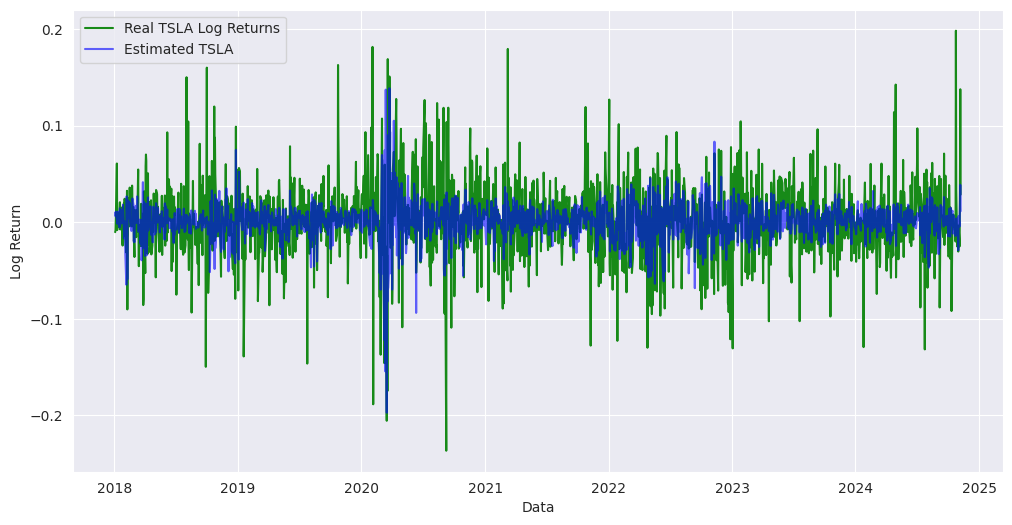

In [ ]:
estimated_movements= general_beta_tsla * sp500_data['Log_Return']
plt.figure(figsize=(12, 6))
plt.plot(tsla_data['Log_Return'], label='Real TSLA Log Returns', color='green', alpha=0.9)
plt.plot(estimated_movements, label='Estimated TSLA', color='blue', alpha=0.6)
plt.xlabel("Data")
plt.ylabel("Log Return")
plt.legend()

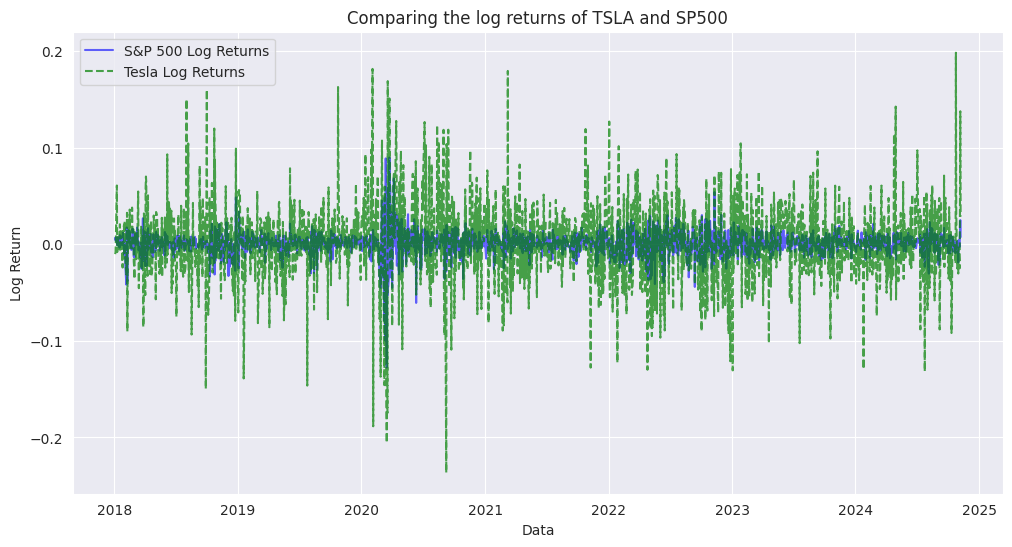

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Log_Return'], label='S&P 500 Log Returns', color='blue', alpha=0.6)
plt.plot(tsla_data['Log_Return'], label='Tesla Log Returns', color='green', linestyle='--', alpha=0.7)
plt.title("Comparing the log returns of TSLA and SP500")
plt.xlabel("Data")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.show()

#Cases of study

## Downside beta
---


Now it's time to split the beta.
In this subsection we want to see compare the *real market movement* of TSLA wrt the estimated one through beta.
It is useful to take the sp500 data after a downturn movement in order to show if our **downside** **beta** is able to capture well the market fluctuations.
The date taken is from 10th April 2024 to 10th June 2024 when the actual wars have created a sort of uncertainty in the market.

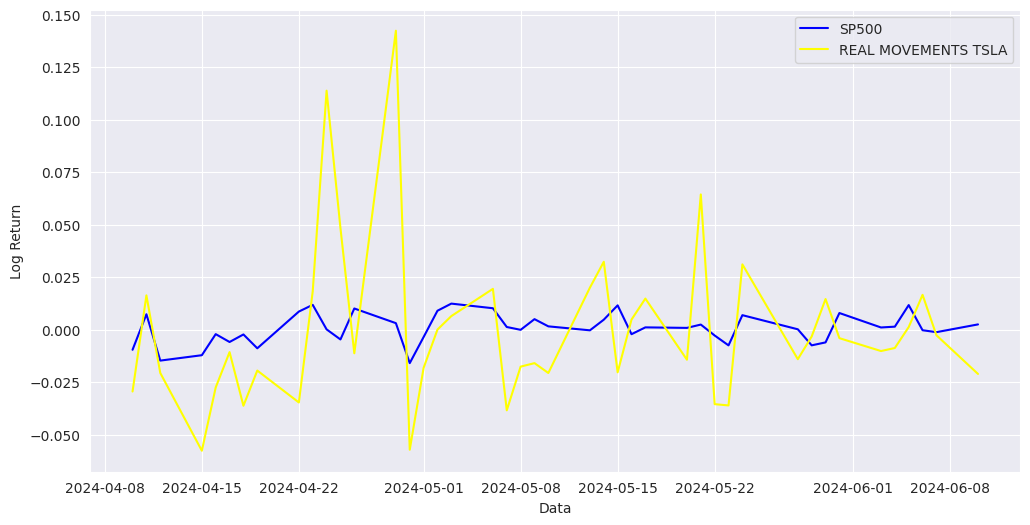

In [ ]:
start_date1= "2024-04-10"
end_date1= "2024-06-10"
sp500_returns= sp500_data.loc[start_date1:end_date1, 'Log_Return']
tsla_returns = tsla_data.loc[start_date1:end_date1, 'Log_Return']
plt.figure(figsize=(12, 6))
plt.plot(sp500_returns, label='SP500', color= 'blue')
plt.plot(tsla_returns, label='REAL MOVEMENTS TSLA', color= 'yellow')
plt.xlabel("Data")
plt.ylabel("Log Return")
plt.legend(['SP500', 'REAL MOVEMENTS TSLA'])

The plot below, instead shows the differences between the real movements of TSLA and the estimated TSLA by looking at the downturns.
Even though we have adjusted the algorithm with *complexity* and *more variables*, the downside beta is still not able to capture all the real jumps. Unfortunately, there are points where the real return is even lower than the expected one and if we were using the beta as **hedge ratio**, our portfolio would be not perfectly hedged.
It would be a mess since our portfolio would have a long market risk exposure [**it means that we have not covered at all our position on TSLA, we have sold for example 30 shares, but we should have sold 50 shares, so we are still extra long of 20.**].
We believe from our downside TSLA beta that Tsla should outperform the market and in reality it outperforms more than what we actually expect.
So, if our aim is having a neutral portfolio:


1.   we can short sp500 using the downside beta multiplied to the exposure of TSLA and keeping into account a source of uncertainty in order to capture all the unpredictable patterns;
2.   we can even taking into account only the performance of TSLA, not compared to sp500. For example, we can think to short tesla since it is more volatile and to be long in a stock that is not influenced by a downturn movement or it is influeced positively. We could use derivatives that respond differently to Tesla’s movements. For example, we could apply a long put on TSLA to protect our portfolio from the downside risk;
3. we can choose to avoid to put tsla in our portfolio as well, since it has these unpredictable big movements if we are looking for stable portfolios.



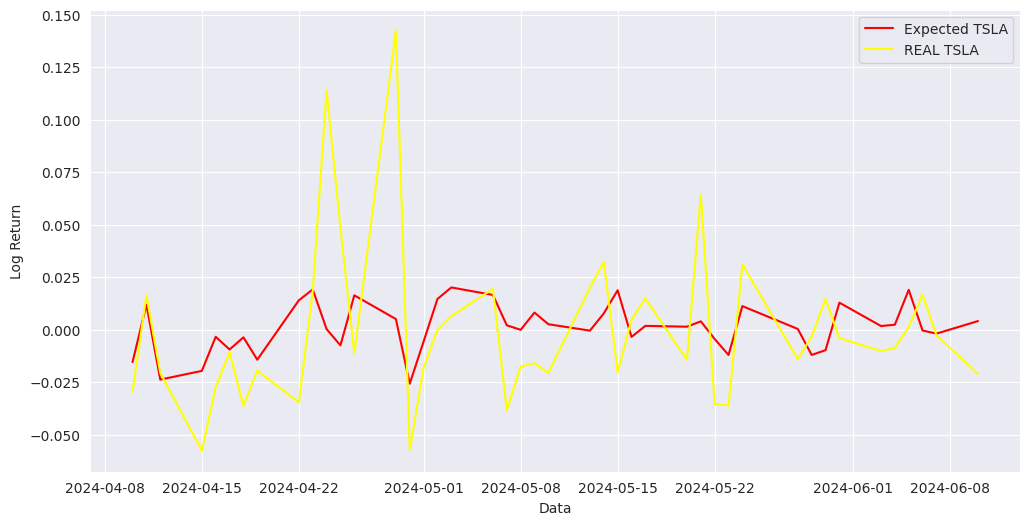

In [ ]:
#comparing with my beta
expec_TSLA = down_beta_tsla * sp500_returns
tsla_returns = tsla_data.loc[start_date1:end_date1, 'Log_Return']
plt.figure(figsize=(12, 6))
plt.plot(expec_TSLA, label='Expected TSLA', color='red')
plt.plot(tsla_returns, label='REAL TSLA', color= 'yellow')
plt.xlabel("Data")
plt.ylabel("Log Return")
plt.legend(['Expected TSLA','REAL TSLA'])

The plot below allows you to visually see the periods where the model is either overestimating or underestimating returns, providing more clarity on its accuracy.
As we see, there are significant periods of negative PNL, it could be an indication that our beta model for downside risk needs further refinement, possibly by including more factors, adjusting for market volatility, or using more advanced models.

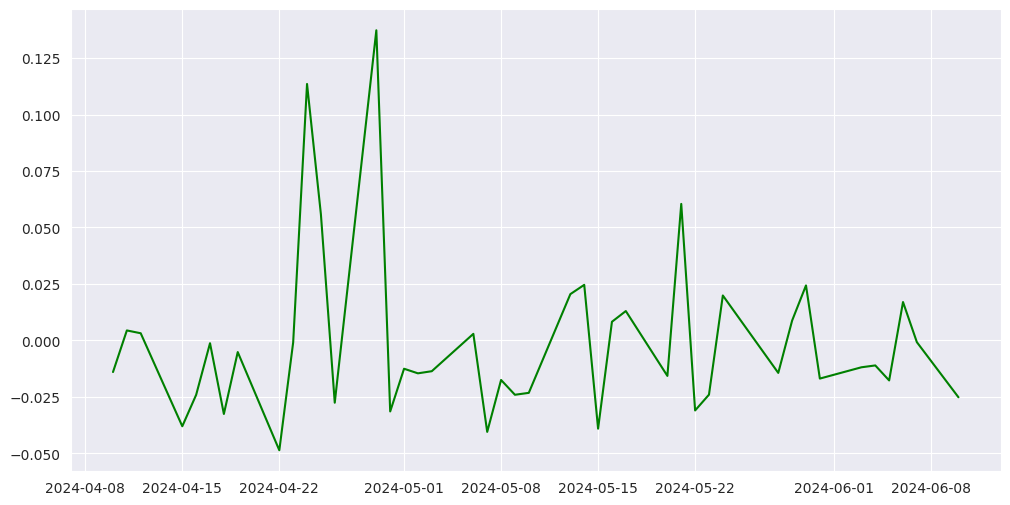

In [ ]:
PNL = tsla_returns - expec_TSLA
plt.figure(figsize=(12, 6))
plt.plot(PNL, label='PNL', color='green')

## Upside beta

---


It's upside beta turn.
We have adopted the same approach.
The data are reached from 01-09-2024 to 15-11-2024 in order to show the peak after Trump's election.

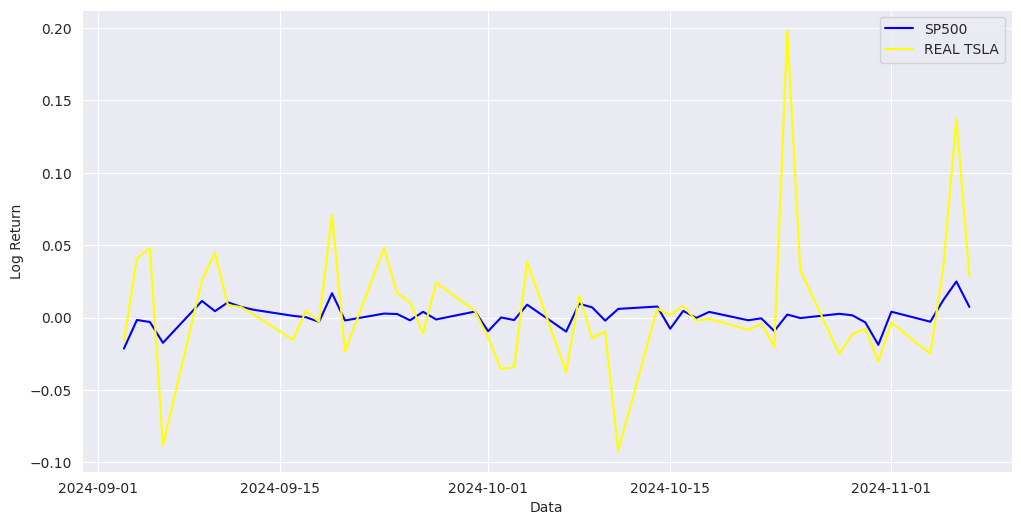

In [ ]:
start_date2= "2024-09-01"
end_date2= "2024-11-15"
sp500_returns_up= sp500_data.loc[start_date2:end_date2, 'Log_Return']
tsla_returns_up = tsla_data.loc[start_date2:end_date2, 'Log_Return']
plt.figure(figsize=(12, 6))
plt.plot(sp500_returns_up, label='SP500', color= 'blue')
plt.plot(tsla_returns_up, label='REAL TSLA', color= 'yellow')
plt.xlabel("Data")
plt.ylabel("Log Return")
plt.legend(['SP500', 'REAL TSLA'])

The upside beta has the worst performance, since it is equal to 1.05.
We expect TSLA moving like the benchmark, but actually it is not true. The upward movements are even higher than the benchmark, therefore the upside beta is able to capture only few points.
Our portfolio, by using beta as hedge ratio, is not hedged perfectly.
As in the downside case, we can short the sp500 by the same amount given by the upside beta, or we can buy a put option in order to protect ourselves from drop in the market.

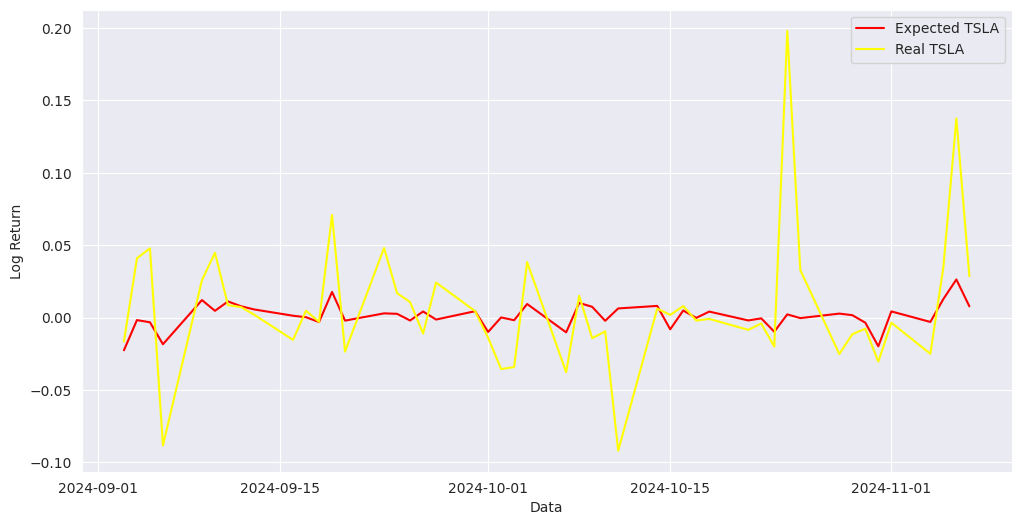

In [ ]:
expec_TSLA_up = up_beta_tsla * sp500_returns_up
plt.figure(figsize=(12, 6))
plt.plot(expec_TSLA_up, label='Expected Return', color='red')
tsla_returns = tsla_data.loc[start_date2:end_date2, 'Log_Return']
plt.plot(tsla_returns_up, label='TSLA', color= 'yellow')
plt.xlabel("Data")
plt.ylabel("Log Return")
plt.legend(['Expected TSLA','Real TSLA'])

The plot below allows you to visually see the periods where the model is either overestimating or underestimating returns, providing more clarity on its accuracy.
As we see, there are significant periods of positive PNL, it could be an indication that our beta model for upside movements needs further refinement, possibly by including more factors, adjusting for market volatility, or using more advanced models.

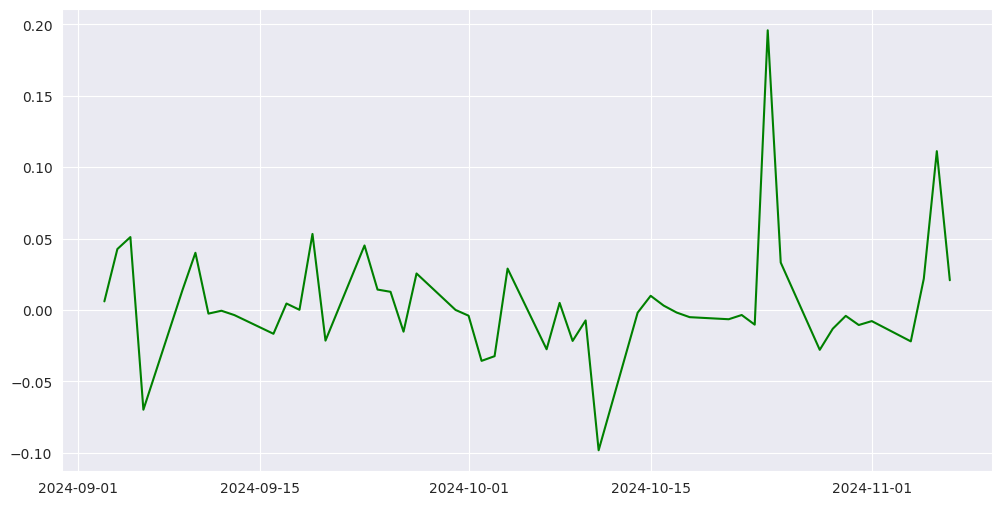

In [ ]:
PNL = tsla_returns_up - expec_TSLA_up
plt.figure(figsize=(12, 6))
plt.plot(PNL, label='PNL', color='green')

# Conclusions
 Beta is an efficient and reliable tool for measuring the risk of your investment against market risk. Calculating beta helps a trader get a fair idea of the risk that a particular stock or portfolio is exposed to.
 Relying only on the general beta doesn't improve so much our analysis, because it takes only an overall value for the bearish and bullish signals of the market. **So, it assumes symmetry in an asset's response to market movements, which isn't always accurate.**

 When we exploit the differences between the upside and the downside beta, we are improving our algorithmic models by looking at how our portfolio can change when either the market is up or down.

 By dividing risk into Upside and Downside segments, investors can better understand risk and **choose stocks more likely to most benefit from upswings and provide minimized volatility during downswings**.
 According Ang. et al(2005), splitting the beta into upside and downside mean disentangling the upside risk from the downside risk. In particular, it shows the systematic risk!

 But unfortunately, it assumes a **linear relationship** between the stocks and the market behaviour and this can lead to a wrong conclusions, especially when we look at only this model.
 Actually the relationship is not linear as we have seen above by exploiting the difference among the expected movement of TSLA and its real movement.
When we focus only on the up and down movements of the benchmark, we are losing information on other factors that are relevant for our trading strategies, like the market sentiment on a particular stock, news or specific sector behaviour.
Therefore, we can think to apply this approach with other complex technique like the delta hedging, copula functions or moreover, incorporating other risk metrics, such as alpha, Sharpe ratio, and value at risk (VaR), can provide a more holistic view of a trading strategy's performance and risk profile.

#References


---




1. Guy, A. (2015). Upside and downside beta portfolio construction: A different approach to risk measurement and portfolio construction. Risk Governance & Control: Financial Markets & Institutions, 5(4), Continued-1, 243.
2. Ang, A., Chen, J., & Xing, Y. (2006). Downside Risk,
Review of Financial Studies, 21(4), 1767 1794.
3. Chainika Thakar and Jay Maniar, QuantInsti. (2022). Asset beta vs. market beta in Python. Retrieved from https://blog.quantinsti.com/asset-beta-market-beta-python/
4. DayTrading.com. (n.d.). *Downside beta vs. upside beta (dual beta)*. Retrieved from [https://www.daytrading.com/downside-beta-vs-upside-beta-dual-beta](https://www.daytrading.com/downside-beta-vs-upside-beta-dual-beta)
5. Simbolon, I. P., & Irsan, M. Y. T. (2017). Liquid stocks: Beta, upside beta & downside beta. *International Journal of Economics, Commerce and Management, 5*(12), 1020.


